In [1]:
# acousticsツールボックスの調査
from acoustics.signal import octave_filter
import acoustics.signal as asig
from scipy import signal
import numpy as np

# Acousticsツールボックスの調査

In [2]:
# 中心周波数の計算法の確認
ob = asig.OctaveBand(center=2000,fraction=3)
print('Acousticsツールボックスによる中心周波数計算 {} Hz'.format(ob.center))

Acousticsツールボックスによる中心周波数計算 [ 1995.26231497] Hz


In [3]:
# https://www.onosokki.co.jp/HP-WK/c_support/newreport/noise/souon_11.htm
# JIS C 1514計算方法
g10 = np.power(10,3/10)
fr  = 1000
N   = 3
fm  = 1000*pow(g10,3/N)
print('JIS C 1514による中心周波数計算 {} Hz'.format(fm))

JIS C 1514による中心周波数計算 1995.2623149688795 Hz


上記確認により、Acousticsツールボックスは、JIS C 1514の方法に則りフィルタ計算していることがわかる。
なお、対応する国際規格は(IEC 61260：1995)である。

In [4]:
# octave_filter (デフォルトでbutterのsosフィルタを設計する)
fc  = 1000
fs  = 44100
of  = asig.octave_filter(center=fc,fs=fs,fraction=3)
b,a = signal.sos2tf(of)
w,h = signal.freqz(b,a)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

(-70, 10)

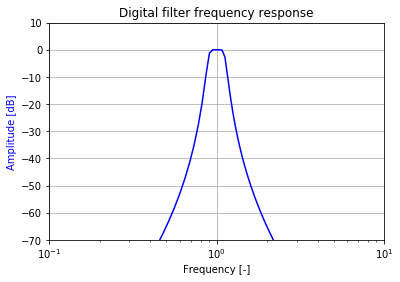

In [6]:
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(fs*w/(2*np.pi)/fc, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [-]')
plt.xscale('log')
plt.grid()
plt.xlim([0.1,10])
plt.ylim([-70,10])

https://www.onosokki.co.jp/HP-WK/c_support/newreport/noise/souon_11.htm
を参照

## acoustics.signal.octavepassの例題
http://python-acoustics.github.io/python-acoustics/signal.html?highlight=frequencies#acoustics.signal.Filterbank.frequencies  
を使ってフィルタを行う

In [82]:
#シグナル作成
sig  = np.random.randn(fs)

#オクターブフィルタの周波数特性作成
from acoustics.octave import Octave
o = Octave(fmin=20.0, fmax=10000, fraction=3)

# 配列確保
fsig = np.zeros((fs,len(o.center)))

# フィルタリング実施
for I in range(len(o.center)):
    fsig[:,I] = asig.octavepass(sig,o.center[I],fs,3)

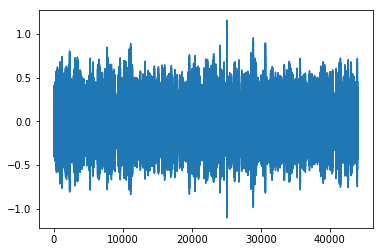

In [90]:
plt.plot(fsig[:,25])

In [78]:
from acoustics.octave import Octave
o = Octave(fmin=100.0, fmax=20000, fraction=3)
o.upper

array([   112.20184543,    141.25375446,    177.827941  ,    223.87211386,
          281.83829313,    354.81338923,    446.68359215,    562.34132519,
          707.94578438,    891.25093813,   1122.0184543 ,   1412.53754462,
         1778.27941004,   2238.72113857,   2818.38293126,   3548.13389234,
         4466.83592151,   5623.4132519 ,   7079.45784384,   8912.50938134,
        11220.18454302,  14125.37544623,  17782.79410039,  22387.21138568])